In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%pip install missingno
import missingno as msno


file_path = '../Data/World-Stock-Prices-Dataset 2.csv'
df = pd.read_csv(file_path)

print("Initial Shape:", df.shape)
print("Initial Columns:", df.columns.tolist())
print("Data Types Before Cleaning:")
print(df.dtypes)

# Quick look at categorical columns before dropping them
print("\nNumber of unique tickers:", df['Ticker'].nunique())
print("Sample tickers:", df['Ticker'].unique()[:10])
print("Unique countries:", df['Country'].unique())
print("Unique industries:", df['Industry_Tag'].unique())


Note: you may need to restart the kernel to use updated packages.
Initial Shape: (303208, 13)
Initial Columns: ['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Brand_Name', 'Ticker', 'Industry_Tag', 'Country', 'Dividends', 'Stock Splits', 'Capital Gains']
Data Types Before Cleaning:
Date              object
Open             float64
High             float64
Low              float64
Close            float64
Volume           float64
Brand_Name        object
Ticker            object
Industry_Tag      object
Country           object
Dividends        float64
Stock Splits     float64
Capital Gains    float64
dtype: object

Number of unique tickers: 61
Sample tickers: ['PTON' 'TSLA' 'COST' 'AMZN' 'AAPL' 'NKE' 'TGT' 'GOOGL' 'SPOT' 'ZM']
Unique countries: ['usa' 'japan' 'germany' 'switzerland' 'canada' 'france' 'netherlands']
Unique industries: ['fitness' 'automotive' 'retail' 'e-commerce' 'technology' 'apparel'
 'music' 'entertainment' 'gaming' 'aviation' 'food & beverage'
 'consumer goods' 


Missing values per column BEFORE cleaning:
Date                  0
Open                  0
High                  0
Low                   0
Close                 0
Volume                0
Brand_Name            0
Ticker                0
Industry_Tag          0
Country               0
Dividends             0
Stock Splits          0
Capital Gains    303206
dtype: int64


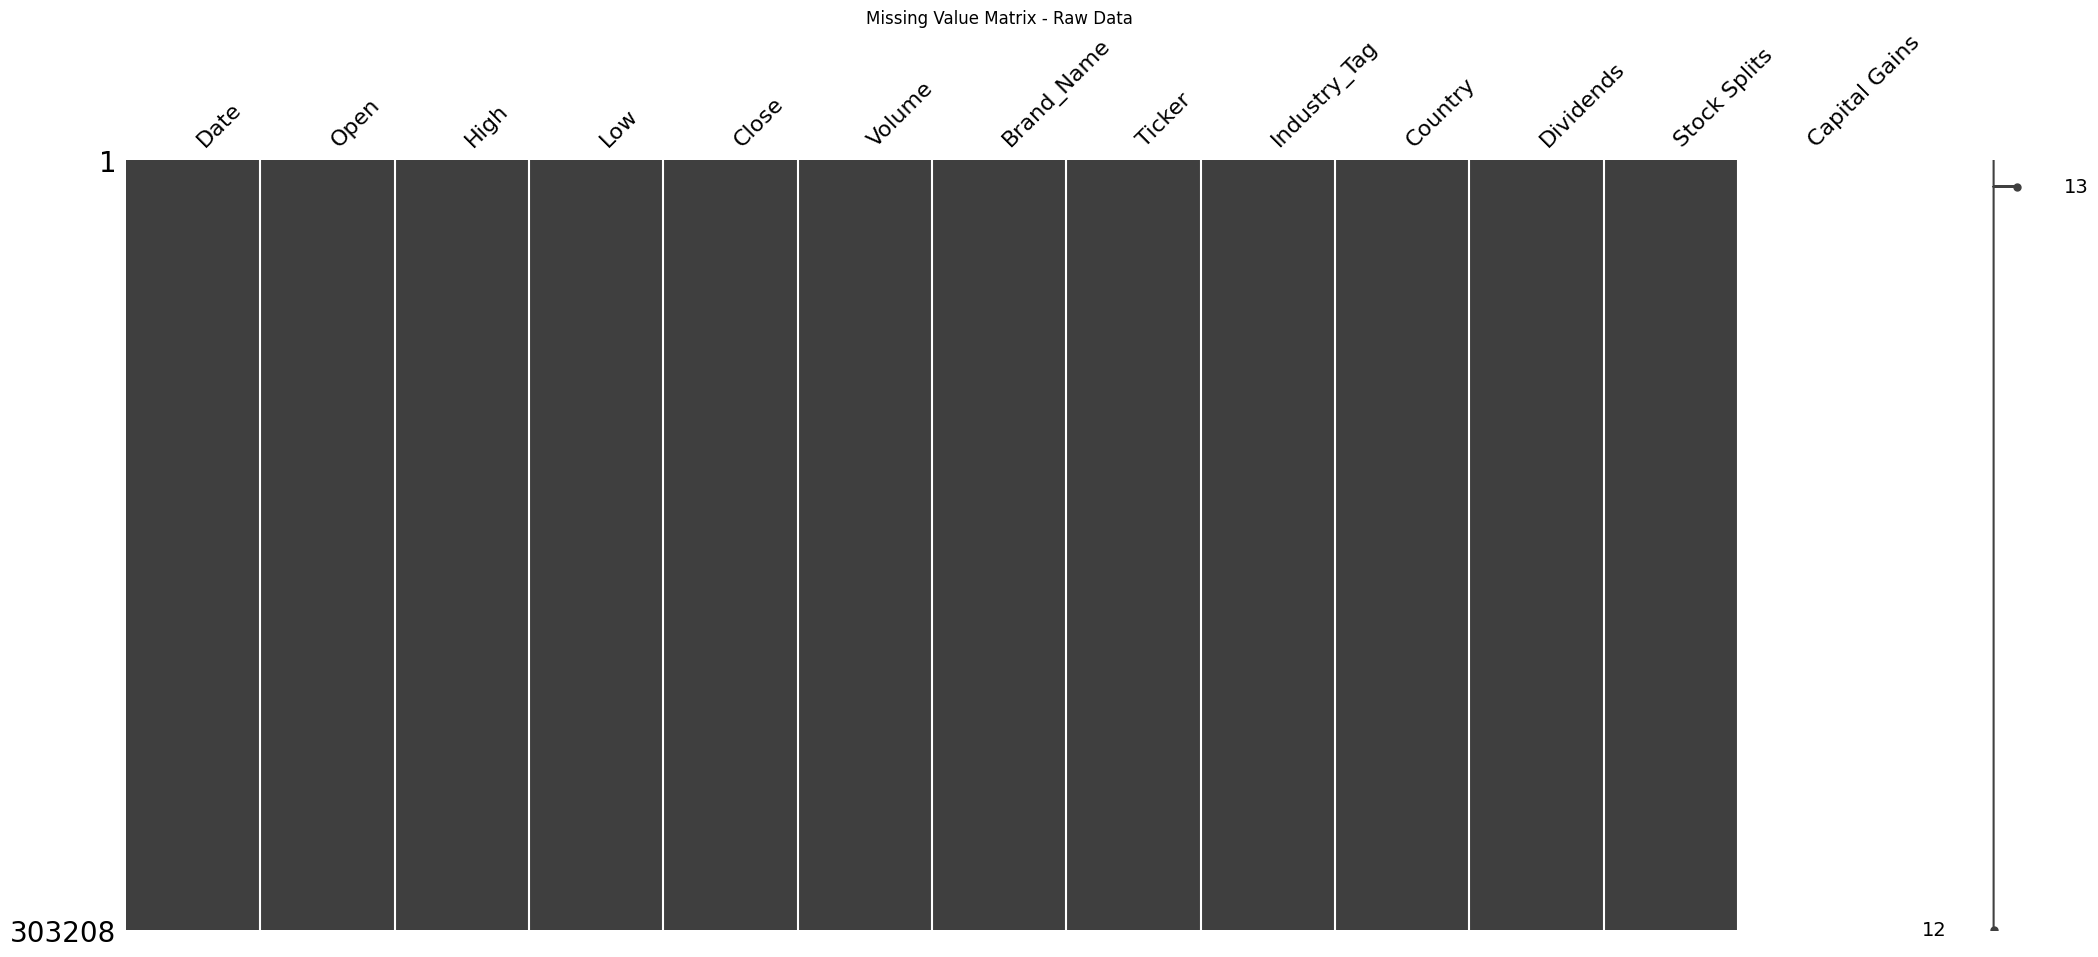

In [15]:
print("\nMissing values per column BEFORE cleaning:")
print(df.isnull().sum())
msno.matrix(df)
plt.title("Missing Value Matrix - Raw Data")
plt.show()


In [16]:
# Drop column with almost all missing values
if df['Capital Gains'].isnull().sum() / len(df) > 0.95:
    print("Dropping Capital Gains column (too many missing values)")
    df = df.drop(columns=['Capital Gains'])

# Convert Date to datetime
print("\nConverting Date column to datetime...")
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df = df.dropna(subset=['Date'])

# Sort values by Ticker and Date for time series consistency
df = df.sort_values(by=['Ticker', 'Date']).reset_index(drop=True)

# Drop duplicates if any
df = df.drop_duplicates()

print("\nMissing values per column AFTER cleaning:")
print(df.isnull().sum())

print("\nShape after cleaning:", df.shape)


Dropping Capital Gains column (too many missing values)

Converting Date column to datetime...


/var/folders/7z/y8pyrws50q34y21479y2jl7h0000gn/T/ipykernel_16106/777149980.py:8: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce')



Missing values per column AFTER cleaning:
Date            0
Open            0
High            0
Low             0
Close           0
Volume          0
Brand_Name      0
Ticker          0
Industry_Tag    0
Country         0
Dividends       0
Stock Splits    0
dtype: int64

Shape after cleaning: (303208, 12)


In [17]:
print("Summary statistics after cleaning:")
print(df.describe())

Summary statistics after cleaning:
                Open           High            Low          Close  \
count  303208.000000  303208.000000  303208.000000  303208.000000   
mean       73.943797      74.780766      73.088295      73.952789   
std       138.854997     140.341188     137.281667     138.837588   
min         0.196890       0.199922       0.192798       0.198861   
25%        15.728261      15.943189      15.510000      15.730000   
50%        34.704152      35.119029      34.287837      34.717432   
75%        80.740873      81.542025      79.935072      80.769997   
max      3445.580078    3463.070068    3370.000000    3427.610107   

             Volume      Dividends   Stock Splits  
count  3.032080e+05  303208.000000  303208.000000  
mean   2.287811e+07       0.003594       0.000894  
std    8.642469e+07       0.069608       0.116743  
min    0.000000e+00       0.000000       0.000000  
25%    1.365100e+06       0.000000       0.000000  
50%    4.578850e+06       0.000

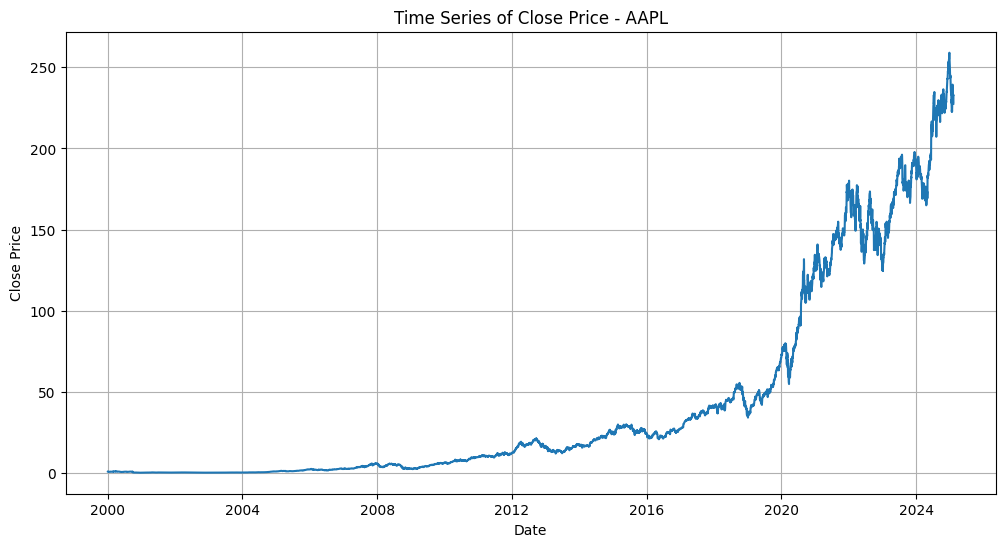

In [18]:
sample_ticker = 'AAPL'  # choose any ticker to visualize
ticker_df = df[df['Ticker'] == sample_ticker]
plt.figure(figsize=(12,6))
plt.plot(ticker_df['Date'], ticker_df['Close'])
plt.title(f'Time Series of Close Price - {sample_ticker}')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.grid(True)
plt.show()



In [19]:
columns_to_drop = ['Brand_Name', 'Industry_Tag', 'Country']
existing_cols_to_drop = [col for col in columns_to_drop if col in df.columns]
df = df.drop(columns=existing_cols_to_drop)
print("Columns after dropping irrelevant:", df.columns.tolist())



Columns after dropping irrelevant: ['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Ticker', 'Dividends', 'Stock Splits']


In [20]:
cleaned_tickers = {tkr: grp.reset_index(drop=True) for tkr, grp in df.groupby('Ticker')}
print("Total tickers prepared:", len(cleaned_tickers))

Total tickers prepared: 61


In [21]:
# Saves Cleaned Dataset
print("Final Dataset Shape:", df.shape)
df.to_csv("../Data/Cleaned_Stock_Data.csv", index=False)


Final Dataset Shape: (303208, 9)
